In [2]:
import numpy as np

def rosen(x):
    return np.sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0, axis=0)

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Настраиваем 3D график
fig = plt.figure(figsize=[15, 10])
ax = fig.gca(projection='3d')

# Задаем угол обзора
ax.view_init(45, 30)

# Создаем данные для графика
X = np.arange(-2, 2, 0.1)
Y = np.arange(-1, 3, 0.1)
X, Y = np.meshgrid(X, Y)
Z = rosen(np.array([X,Y]))

# Рисуем поверхность
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
plt.show()

<Figure size 1500x1000 with 1 Axes>

In [4]:
%%time
from scipy.optimize import minimize
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='nelder-mead',
    options={'xtol': 1e-8, 'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571
[1. 1. 1. 1. 1.]
Wall time: 2.01 s


In [5]:
class Vector(object):
    def __init__(self, x, y):
        """ Create a vector, example: v = Vector(1,2) """
        self.x = x
        self.y = y

    def __repr__(self):
        return "({0}, {1})".format(self.x, self.y)

    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Vector(x, y)

    def __sub__(self, other):
        x = self.x - other.x
        y = self.y - other.y
        return Vector(x, y)
    
    def __rmul__(self, other):
        x = self.x * other
        y = self.y * other
        return Vector(x, y)

    def __truediv__(self, other):
        x = self.x / other
        y = self.y / other
        return Vector(x, y)

    def c(self):
        return (self.x, self.y)

In [6]:
def func(point):
    x, y = point
    return x*np.sqrt(y) - x**2 + x - 2*y

def neg_func(point):
    return -func(point)

def classic_rosen(point):
    x, y = point
    return (1 - x)**2 + 100*(y - x**2)**2

D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  
D:\Programs\Anaconda\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


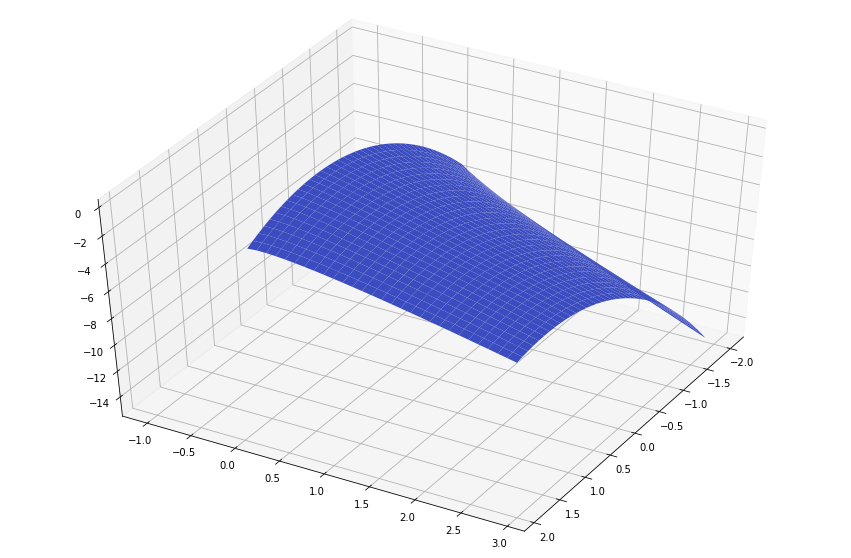

In [7]:
fig = plt.figure(figsize=[15, 10])
ax = fig.gca(projection='3d')

# Задаем угол обзора
ax.view_init(45, 30)

# Создаем данные для графика
X = np.arange(-2, 2, 0.1)
Y = np.arange(-1, 3, 0.1)
X, Y = np.meshgrid(X, Y)
Z = func(np.array([X,Y]))

# Рисуем поверхность
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
plt.show()

In [8]:
def nelder_mead(f, alpha=1, beta=0.5, gamma=2, maxiter=10, verbose=False):
# initialization
    v1 = Vector(0, 0)
    v2 = Vector(1.0, 0)
    v3 = Vector(0, 1)

    for i in range(maxiter):
        adict = {v1:f(v1.c()), v2:f(v2.c()), v3:f(v3.c())}
        points = sorted(adict.items(), key=lambda x: x[1])
        
        b = points[0][0]
        g = points[1][0]
        w = points[2][0]
        

        mid = (g + b)/2

        # reflection
        xr = mid + alpha * (mid - w)
        if f(xr.c()) < f(g.c()):
            w = xr
        else:
            if f(xr.c()) < f(w.c()):
                w = xr
            c = (w + mid)/2
            if f(c.c()) < f(w.c()):
                w = c
        if f(xr.c()) < f(b.c()):

            # expansion
            xe = mid + gamma * (xr - mid)
            if f(xe.c()) < f(xr.c()):
                w = xe
            else:
                w = xr
        if f(xr.c()) > f(g.c()):
            
            # contraction
            xc = mid + beta * (w - mid)
            if f(xc.c()) < f(w.c()):
                w = xc

        # update points
        v1 = w
        v2 = g
        v3 = b
        
        if verbose: 
            print('Iter {0}: Best point = {1}; Good point = {2}; Wrost point: {3}'.format(i, b, g, w))
            
    return b

In [9]:
%%time
print("Result of Nelder-Mead algorithm: ")
xk = nelder_mead(classic_rosen, maxiter=100)
print("Best poits is: %s"%(xk))

Result of Nelder-Mead algorithm: 
Best poits is: (0, 0)
Wall time: 2.99 ms


In [10]:
%%time
print("Result of Nelder-Mead algorithm: ")
xk = nelder_mead(neg_func, maxiter=200)
print("Best poits is: %s"%(xk))

Result of Nelder-Mead algorithm: 
Best poits is: (0.5714285731449853, 0.020408162961786415)
Wall time: 5.98 ms


D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
%%time
initial_simplex = np.array([0, 0],[0, 1],[1, 0])
x0 = np.array([0, 0])
res = minimize(neg_func, method='nelder-mead',
              options={'initial_simplex' : initial_simplex})
print(res.x)

ValueError: only 2 non-keyword arguments accepted